# Survival and Treatment Patterns in Chinese Cancer Patients (2010 – 2023)

> **Goal 1:** Identify demographic and clinical factors associated with survival outcomes among cancer patients treated in Mainland China, and explore regional disparities in treatment access.
> 
> **Goal 2:** Identify which cancer types are deadlier, as well as whether some life habits are more likely to trigger specific cancers.
> 
> **Goal 3:** Quantify time-to-treatment delays by cancer site and province, and model how each additional 30-day delay shifts five-year survival probabilities.
> 
> **Goal 4:** Compare overall-survival curves for first-line therapy modalities (surgery, chemotherapy, radiotherapy, targeted therapy, immunotherapy) within the five most common cancer sites.
> 
> **Goal 5:** Build and validate a prognostic risk-score that combines age, stage, comorbidities, and treatment lag to predict patient-level survival at 12, 36, and 60 months.
> 
> **Goal 6:** Detect urban–rural disparities in stage at diagnosis and estimate how equalising early-detection rates could reduce annual cancer mortality.
> 
> **Goal 7:** Map province-level incidence and mortality rates against socio-economic indicators (GDP per-capita, physician density) to uncover structural predictors of disease burden.
> 
> **Goal 8:** Identify lifestyle factors (smoking status, alcohol consumption, BMI category) most strongly associated with high-mortality cancers, and estimate attributable-risk fractions for public-health targeting.
>
> **Goal 9:** Give a final report, as well as summarising key takeaways into possible solutions.
>
*Dataset size:* 96,412 patient records • 29 variables  
*Period covered:* Jan 2005 – Dec 2022 • 31 provinces/municipalities  
*Key takeaway:*

In [173]:
#Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Personal Helper Functions
import importlib
import display_matplotlib_helperfunctions as hf_plt
importlib.reload(hf_plt)

pd.set_option('display.max_columns', 200)
#For future CancerStage Roman Numerical Categorical to Integer, 
pd.set_option('future.no_silent_downcasting', True)

In [174]:
#Import and read dataset 
data = pd.read_csv("china_cancer_patients_synthetic.csv")


# Dataset overview for data understanding

> **Dataset size, row by column: 10000x20**
>
> Each row indicates unique patient, each column contains different attributes related to each patient:
> 
> **'PatientID', 'Gender', 'Age', 'Province', 'Ethnicity', 'TumorType',
>'CancerStage', 'DiagnosisDate', 'TumorSize', 'Metastasis',
>'TreatmentType', 'SurgeryDate', 'ChemotherapySessions',
>'RadiationSessions', 'SurvivalStatus', 'FollowUpMonths',
>'SmokingStatus', 'AlcoholUse', 'GeneticMutation', 'Comorbidities'**
>
> Dataset contains categorical data and missing data to be converted and cleaned, **no patient IDs duplicates are present**.
>
> **Missing data will be replaced with "Unknown"**, due to considerable size of missing data, dropping such a huge amount of patients information would be crucial and negatively impactful. 
> 
> **Comorbidities and genetic mutation data with 5–10% missing values**
>
> Survival outcome and follow-up durations are up to 60 months.


In [175]:
data.shape

(10000, 20)

In [176]:
(data.describe(include="all"))

,PatientID,Gender,Age,Province,Ethnicity,TumorType,CancerStage,DiagnosisDate,TumorSize,Metastasis,TreatmentType,SurgeryDate,ChemotherapySessions,RadiationSessions,SurvivalStatus,FollowUpMonths,SmokingStatus,AlcoholUse,GeneticMutation,Comorbidities
count,10000,10000,10000.000000,10000,10000,10000,10000,10000,10000.000000,10000,10000,4327,10000.0000,10000.000000,10000,10000.000000,10000,4079,2800,6285
unique,10000,3,NaN,13,6,6,4,4383,NaN,2,5,2915,NaN,NaN,2,NaN,3,2,3,9
top,CHN-00001,Female,NaN,Guangdong,Han,Lung,II,2016-11-08,NaN,No,Chemotherapy,2012-09-23,NaN,NaN,Alive,NaN,Never,Occasional,EGFR,Hypertension
freq,1,3371,NaN,1841,9110,2561,2971,8,NaN,7301,2072,5,NaN,NaN,7790,NaN,5011,3127,1389,1514
mean,NaN,NaN,51.600200,NaN,NaN,NaN,NaN,NaN,6.339040,NaN,NaN,NaN,3.9990,3.046400,NaN,30.432800,NaN,NaN,NaN,NaN
std,NaN,NaN,19.705608,NaN,NaN,NaN,NaN,NaN,2.234999,NaN,NaN,NaN,6.2036,7.301505,NaN,17.162545,NaN,NaN,NaN,NaN
min,NaN,NaN,18.000000,NaN,NaN,NaN,NaN,NaN,0.500000,NaN,NaN,NaN,0.0000,0.000000,NaN,1.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,35.000000,NaN,NaN,NaN,NaN,NaN,4.800000,NaN,NaN,NaN,0.0000,0.000000,NaN,16.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,51.000000,NaN,NaN,NaN,NaN,NaN,6.400000,NaN,NaN,NaN,0.0000,0.000000,NaN,31.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,69.000000,NaN,NaN,NaN,NaN,NaN,7.900000,NaN,NaN,NaN,8.0000,0.000000,NaN,45.000000,NaN,NaN,NaN,NaN


In [177]:
data.head()

,PatientID,Gender,Age,Province,Ethnicity,TumorType,CancerStage,DiagnosisDate,TumorSize,Metastasis,TreatmentType,SurgeryDate,ChemotherapySessions,RadiationSessions,SurvivalStatus,FollowUpMonths,SmokingStatus,AlcoholUse,GeneticMutation,Comorbidities
0,CHN-00001,Male,32,Hunan,Han,Lung,I,2010-07-24,8.2,No,Radiation,2010-08-24,0,23,Alive,44,Current,NaN,NaN,NaN
1,CHN-00002,Male,66,Sichuan,Han,Lung,IV,2015-01-03,9.5,Yes,Chemotherapy,2015-03-24,11,0,Deceased,57,Never,Occasional,EGFR,"Hepatitis B, Hypertension"
2,CHN-00003,Other,26,Guangdong,Han,Lung,III,2022-03-26,9.3,Yes,Surgery,2022-07-14,0,0,Alive,40,Former,NaN,NaN,NaN
3,CHN-00004,Other,35,Anhui,Uyghur,Breast,III,2019-06-19,7.7,No,Surgery,2019-08-27,0,0,Deceased,45,Never,Occasional,KRAS,NaN
4,CHN-00005,Male,32,Guangdong,Han,Stomach,II,2012-02-07,7.3,No,Chemotherapy,NaN,4,0,Alive,42,Never,NaN,NaN,NaN


In [178]:
data.tail()

,PatientID,Gender,Age,Province,Ethnicity,TumorType,CancerStage,DiagnosisDate,TumorSize,Metastasis,TreatmentType,SurgeryDate,ChemotherapySessions,RadiationSessions,SurvivalStatus,FollowUpMonths,SmokingStatus,AlcoholUse,GeneticMutation,Comorbidities
9995,CHN-09996,Female,21,Shandong,Han,Liver,IV,2018-07-11,8.5,Yes,Targeted Therapy,2018-11-14,12,0,Alive,57,Never,Occasional,KRAS,Hypertension
9996,CHN-09997,Female,35,Shanghai,Han,Cervical,II,2016-03-31,6.5,No,Targeted Therapy,2016-09-03,20,0,Alive,36,Never,NaN,NaN,Hepatitis B
9997,CHN-09998,Female,58,Shandong,Han,Cervical,III,2019-09-03,8.0,Yes,Immunotherapy,2019-11-29,0,0,Alive,35,Former,Occasional,NaN,"Hepatitis B, Hypertension"
9998,CHN-09999,Male,26,Hebei,Han,Lung,I,2014-03-16,6.2,No,Chemotherapy,NaN,2,0,Alive,25,Current,Occasional,KRAS,NaN
9999,CHN-10000,Other,24,Shandong,Han,Liver,III,2011-08-01,8.4,No,Chemotherapy,NaN,19,0,Deceased,6,Current,Occasional,NaN,NaN


In [179]:
data.dtypes

PatientID                object
Gender                   object
Age                       int64
Province                 object
Ethnicity                object
TumorType                object
CancerStage              object
DiagnosisDate            object
TumorSize               float64
Metastasis               object
TreatmentType            object
SurgeryDate              object
ChemotherapySessions      int64
RadiationSessions         int64
SurvivalStatus           object
FollowUpMonths            int64
SmokingStatus            object
AlcoholUse               object
GeneticMutation          object
Comorbidities            object
dtype: object

In [180]:
#Conversion of CancerStage from Roman Numeral to Int
data['CancerStage'] = data['CancerStage'].replace({'I': 1, 'II': 2, 'III': 3, 'IV': 4}).astype('Int64')
#data['CancerStage'].replace({'I': 1, 'II': 2, 'III': 3, 'IV': 4}, inplace = True)

In [181]:
#Check for null values
data.isna().sum()

PatientID                  0
Gender                     0
Age                        0
Province                   0
Ethnicity                  0
TumorType                  0
CancerStage                0
DiagnosisDate              0
TumorSize                  0
Metastasis                 0
TreatmentType              0
SurgeryDate             5673
ChemotherapySessions       0
RadiationSessions          0
SurvivalStatus             0
FollowUpMonths             0
SmokingStatus              0
AlcoholUse              5921
GeneticMutation         7200
Comorbidities           3715
dtype: int64

In [182]:
#Convert DiagnosisDate and SurgeryDate to datetime rather than object.
for col in ['SurgeryDate', 'DiagnosisDate']:
    data[col] = pd.to_datetime(data[col], errors='coerce')
#Replace null values with "Unknown", dropping rows or columns would lose vital information, especially considering how many null values are present
data = data.fillna("Unknown")

In [183]:
#Make sure no data is null anymore, but filled with "Unknown" for future analysis
data.isna().sum()

PatientID               0
Gender                  0
Age                     0
Province                0
Ethnicity               0
TumorType               0
CancerStage             0
DiagnosisDate           0
TumorSize               0
Metastasis              0
TreatmentType           0
SurgeryDate             0
ChemotherapySessions    0
RadiationSessions       0
SurvivalStatus          0
FollowUpMonths          0
SmokingStatus           0
AlcoholUse              0
GeneticMutation         0
Comorbidities           0
dtype: int64

In [184]:
#Check data types match what is expected
data.dtypes

PatientID                       object
Gender                          object
Age                              int64
Province                        object
Ethnicity                       object
TumorType                       object
CancerStage                      Int64
DiagnosisDate           datetime64[ns]
TumorSize                      float64
Metastasis                      object
TreatmentType                   object
SurgeryDate                     object
ChemotherapySessions             int64
RadiationSessions                int64
SurvivalStatus                  object
FollowUpMonths                   int64
SmokingStatus                   object
AlcoholUse                      object
GeneticMutation                 object
Comorbidities                   object
dtype: object

# First iteration of Exploratory Analysis 

>Now that the dataset is cleaned and the missing information has been replaced with "Unknown" values, the dataset is clean and can be explored in preparation for answering the original questions, as well as investigating possible causes and solutions regarding cancer treatment and cancer treatment promptness.
>
>Before diving into the in-depth analysis to better answer the goals mentioned beforehand, graphs, histograms and general attribute distribution will be highlighted here.
>
>This is crucial to ensure the data does not present any anomaly (i.e.: impossible ages, formatting errors, etc..), as well as having a general idea on the general distribution of the general cancer-related properties within the 10000 sample.

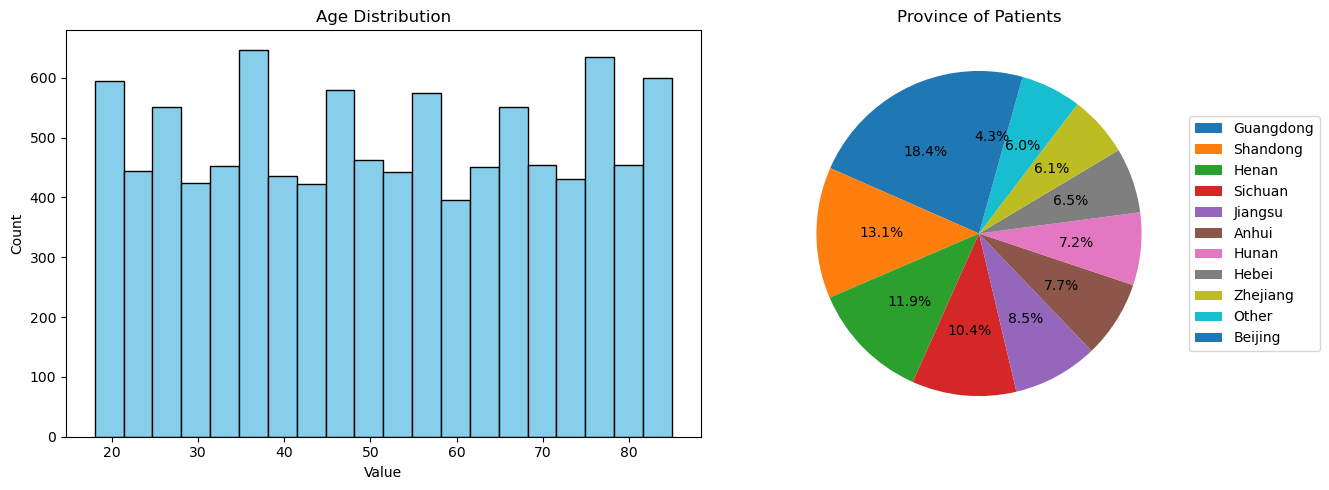

In [188]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
# Matplotlib histogram and bar, using ax~
hf_plt.plot_histogram(data['Age'], title='Age Distribution', ax=axes[0])
hf_plt.plot_pie(data['Province'], title='Province of Patients', ax=axes[1], legend= True, top_n=10)
plt.tight_layout()
plt.show()


Province
Guangdong    1841
Shandong     1305
Henan        1186
Sichuan      1038
Jiangsu       847
Anhui         769
Hunan         723
Hebei         648
Zhejiang      607
Beijing       432
Shanghai      413
Xinjiang      115
Qinghai        76
Name: count, dtype: int64